In [2]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [4]:
# Step 1: Load the CSV file and basic checks

# Import required libraries
import pandas as pd

# Load the dataset (you renamed it to heart.csv)
df = pd.read_csv("heart.csv")

# Preview first few rows
print("First 5 records:")
print(df.head())

# Check the shape (rows, columns)
print("\nDataset shape:", df.shape)

# Data types and null values
print("\nData info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

First 5 records:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        0      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset shape: (10, 14)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       10 non-null     int64  
 1   sex       10 non-null     int64  
 2   cp        10 non-null     int64  
 3   trestbps  10 non-null    

Statistical Summary:
             age        sex         cp    trestbps       chol        fbs  \
count  10.000000  10.000000  10.000000   10.000000   10.00000  10.000000   
mean   52.500000   0.700000   1.500000  131.000000  268.20000   0.200000   
std     8.527733   0.483046   1.080123    9.067647   51.10512   0.421637   
min    37.000000   0.000000   0.000000  120.000000  204.00000   0.000000   
25%    48.500000   0.250000   1.000000  122.500000  233.75000   0.000000   
50%    55.000000   1.000000   1.500000  130.000000  253.00000   0.000000   
75%    57.000000   1.000000   2.000000  138.750000  287.50000   0.000000   
max    63.000000   1.000000   3.000000  145.000000  354.00000   1.000000   

         restecg     thalach      exang    oldpeak      slope         ca  \
count  10.000000   10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.500000  164.900000   0.300000   1.610000   1.200000   0.400000   
std     0.527046   12.413702   0.483046   1.167571   0.918937   0.

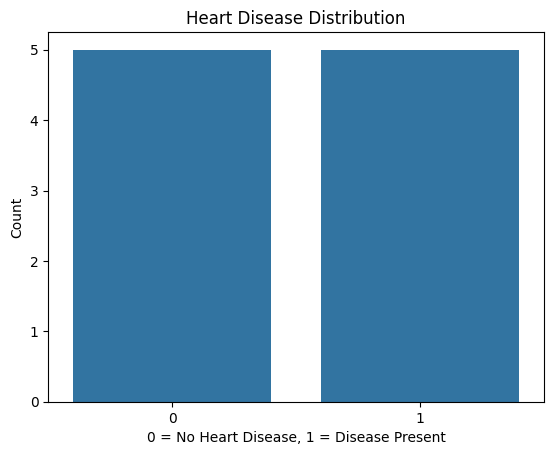

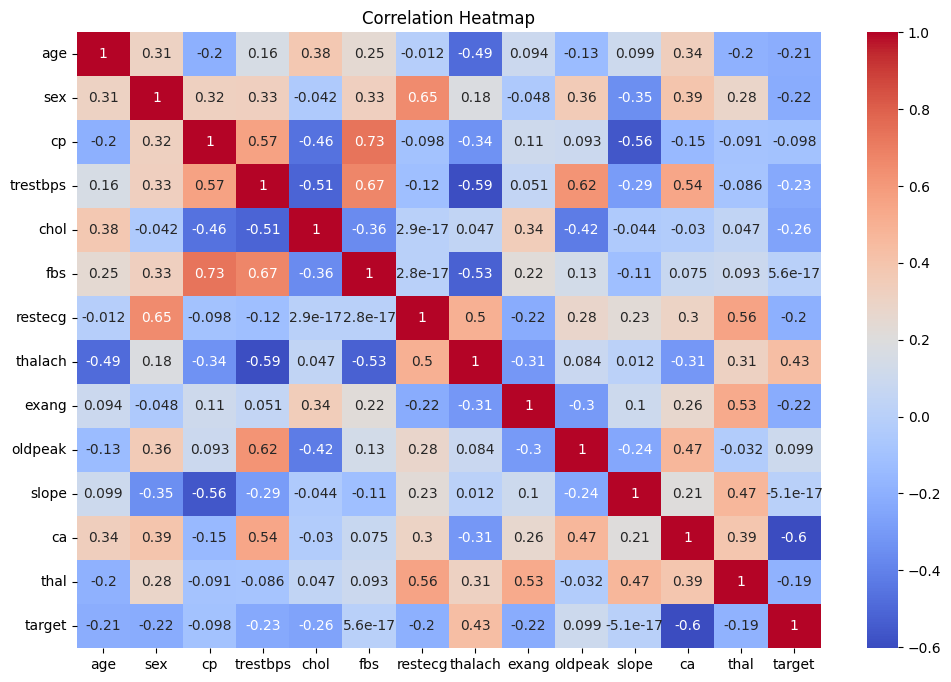

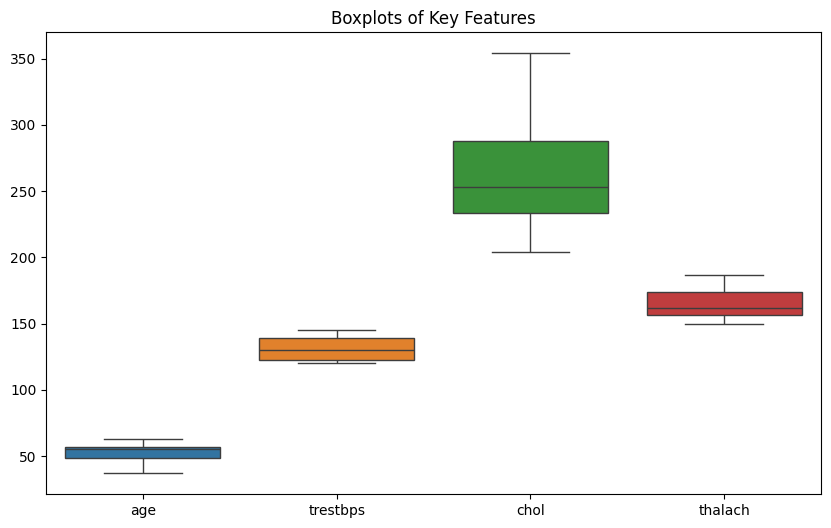

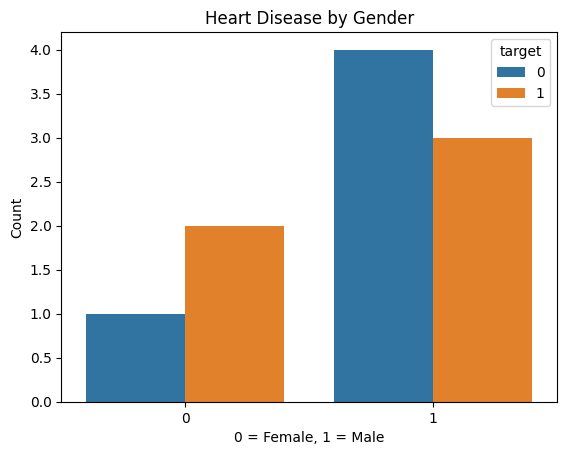

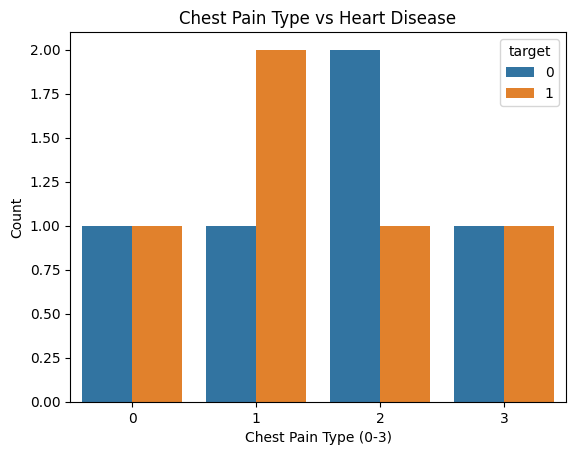

In [7]:
# Step 2: Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Statistical Summary:")
print(df.describe())

# Target variable distribution
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.xlabel("0 = No Heart Disease, 1 = Disease Present")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplot to check outliers in selected features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach']])
plt.title("Boxplots of Key Features")
plt.show()

# Gender-wise heart disease
sns.countplot(x='sex', hue='target', data=df)
plt.title("Heart Disease by Gender")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Count")
plt.show()

# Chest Pain type vs Target
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (0-3)")
plt.ylabel("Count")
plt.show()

In [8]:
# Step 3: Data Preprocessing

# Load the renamed CSV file
import pandas as pd
df = pd.read_csv("heart.csv")

# Split dataset into input features (X) and target (y)
X = df.drop('target', axis=1)   # All columns except 'target'
y = df['target']                # Target column (0 = No, 1 = Yes)

# Feature Scaling (standardization using StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all features to mean=0 and std=1

# Train-Test Split (70% train, 30% test) with class balance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Optional: Check the result
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Class balance in y_test:\n", y_test.value_counts())


X_train shape: (7, 13)
X_test shape: (3, 13)
Class balance in y_test:
 target
0    2
1    1
Name: count, dtype: int64


In [9]:
# Step 4: Model Training and Evaluation (Random Forest)

# Import the model
from sklearn.ensemble import RandomForestClassifier

# Train the model on training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=[0, 1]))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[0 2]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



In [10]:
import joblib

# Save the trained model
joblib.dump(model, "heart_model.pkl")

# Save the scaler used during preprocessing
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']